# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** GABRIELLO DWI JANUAR SUSANTO
- **Email:** gabriellodwi@gmail.com
- **ID Dicoding:** gabriellodwi

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hari libur dan akhir pekan terhadap pola penggunaan sepeda dibandingkan dengan hari kerja biasa?
- Bagaimana pengaruh kelembapan, suhu, atau kecepatan angin terhadap keputusan dalam menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile,os,shutil
from google.colab import files, drive
import pathlib
import warnings

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
df_day = pd.read_csv('/content/drive/MyDrive/Datasets/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour = pd.read_csv('/content/drive/MyDrive/Datasets/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

File **day.csv**
- Dataset ini mencakup 731 hari (2011-2012), dengan distribusi yang seimbang antara kedua tahun.
- Tidak ada nilai yang hilang, semua kolom memiliki data yang lengkap.
- Distribusi musim menunjukkan bahwa semua empat musim terwakili dengan porsi yang hampir sama.
- Rata-rata peminjaman sepeda harian (cnt) sekitar 4504 sepeda, dengan minimum 22 dan maksimum 8714.
- Jumlah pengguna biasa (casual) (rata-rata: 848) jauh lebih rendah daripada pengguna terdaftar (registered) (rata-rata: 3656).
- Kondisi lingkungan seperti temperatur (rata-rata: 0.50), kelembapan (0.63), dan kecepatan angin (0.19) sudah dinormalisasi dan tercatat secara konsisten.
- Rata-rata hari kerja berjumlah sekitar 68% dari data, yang menunjukkan bahwa sebagian besar transaksi terjadi selama hari kerja.
- Kondisi cuaca sebagian besar berada dalam kategori cerah atau berawan (kategori 1), sedangkan peristiwa cuaca ekstrem (kategori 4) jarang terjadi.

File **hour.csv**
- Dataset ini mencakup 17.379 catatan jam, yang mencakup tahun 2011 dan 2012.
- Tidak ada nilai yang hilang di setiap kolom.
- Rata-rata peminjaman sepeda per jam (cnt) adalah 189 sepeda, dengan maksimum 977 sepeda dalam satu jam.
- Pengguna biasa (rata-rata: 36) meminjam lebih sedikit sepeda per jam dibandingkan pengguna terdaftar (rata-rata: 154), konsisten dengan pola harian.
- Kondisi cuaca per jam, suhu, dan kelembapan sejalan dengan data harian, menunjukkan korelasi yang kuat antara faktor lingkungan dan peminjaman.
- Tipe cuaca didominasi oleh kondisi cerah/berawan, mirip dengan dataset harian.
- Perilaku peminjaman juga sangat bervariasi berdasarkan jam dalam sehari, dengan kemungkinan jam puncak terkait dengan waktu berangkat dan pulang kerja.

### Assessing Data

In [6]:
# Melihat data pada day.csv

df_day.info()
print("\nTotal duplikasi pada file: ", df_day.duplicated().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Total duplikasi pada file:  0 



In [7]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak ditemukan duplikasi pada dataset
- Tidak ditemukan missing value pada dataset
- Dataset dalam keadaan bersih, tidak perlu ke tahap cleaning data
- Sejumlah kolom seperti temp dan windspeed telah dinormalisasi

### Cleaning Data

**Insight:**
- Dataset sudah dalam keadaan bersih, tidak diperlukan cleaning data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [10]:
# Create a new column 'weekend' (1 if Saturday or Sunday, otherwise 0)
df_day['weekend'] = df_day['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)


In [11]:
# View the updated DataFrame
df_day[['dteday', 'weekday', 'workingday', 'holiday', 'weekend']].head()

,dteday,weekday,workingday,holiday,weekend
0,2011-01-01,6,0,0,1
1,2011-01-02,0,0,0,1
2,2011-01-03,1,1,0,0
3,2011-01-04,2,1,0,0
4,2011-01-05,3,1,0,0


**Insight:**
- Di sini, kita sedang membuat fitur baru yang akan menentukan apakah hari itu akhir pekan atau tidak. (1 untuk hari libur, 0 untuk hari minggu).
- Kolom baru ini sangat penting untuk menjawab pertanyaan pertama: "Bagaimana hari libur dan akhir pekan mempengaruhi pola penggunaan sepeda dibandingkan dengan hari kerja biasa?"
- Bagian ini menyederhanakan analisis lebih lanjut dengan mengkategorikan akhir pekan dan hari kerja secara jelas untuk perbandingan yang mudah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


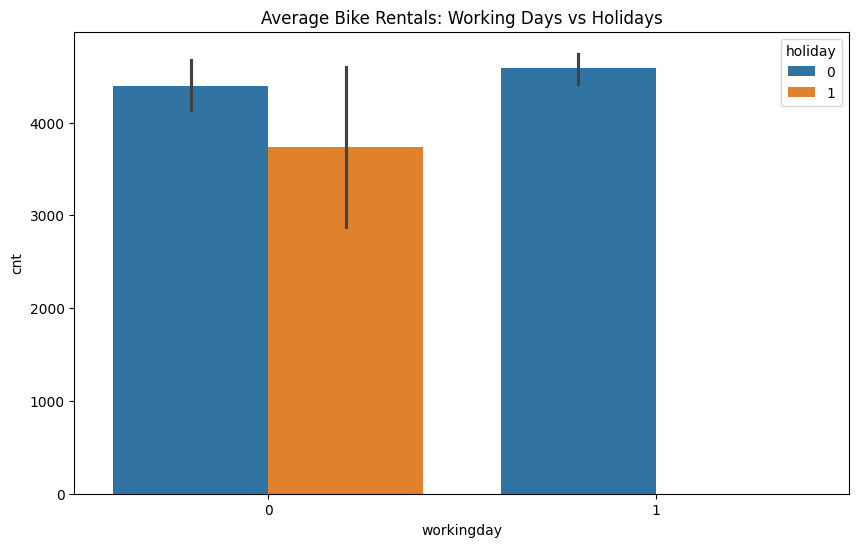

In [15]:
df_grouped = df_day.groupby(['workingday', 'holiday', 'weekend'])['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', hue='holiday', data=df_day)
plt.title('Average Bike Rentals: Working Days vs Holidays')
plt.show()


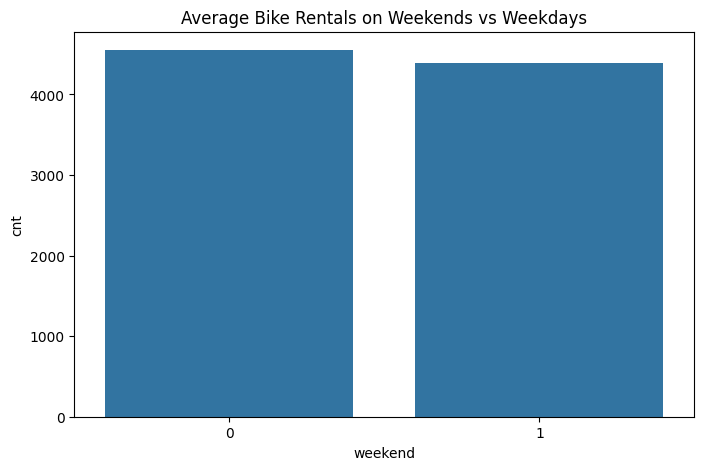

In [16]:
weekend_vs_weekday = df_day.groupby('weekend')['cnt'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='weekend', y='cnt', data=weekend_vs_weekday)
plt.title('Average Bike Rentals on Weekends vs Weekdays')
plt.show()


### Pertanyaan 2:

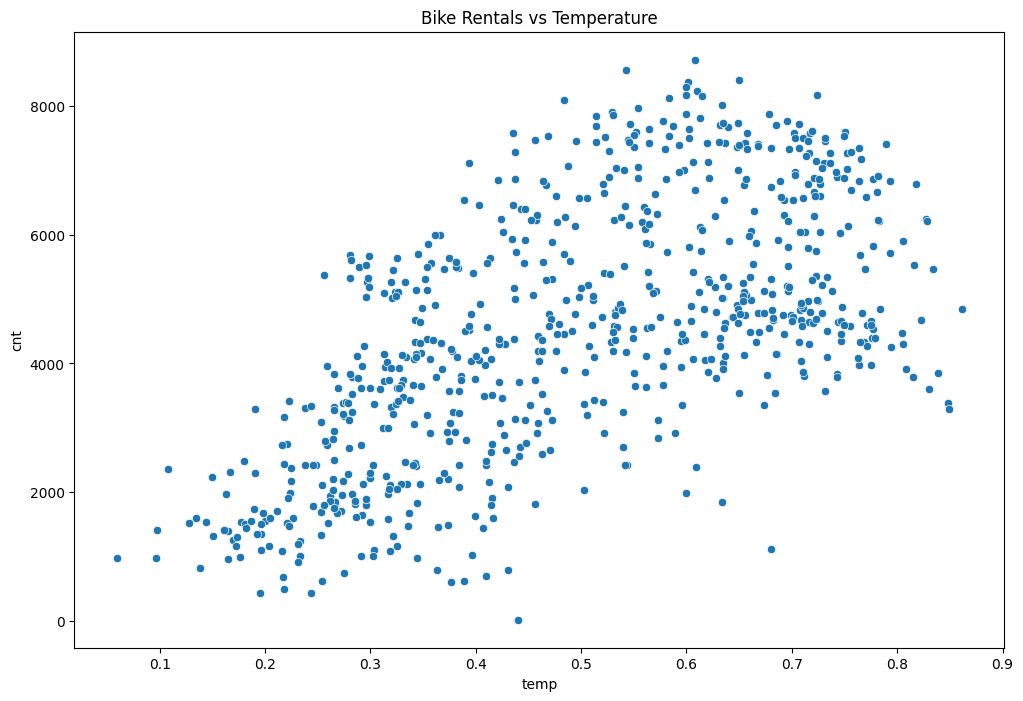

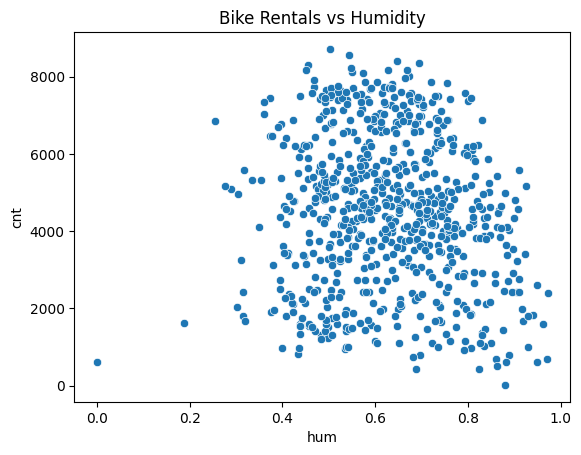

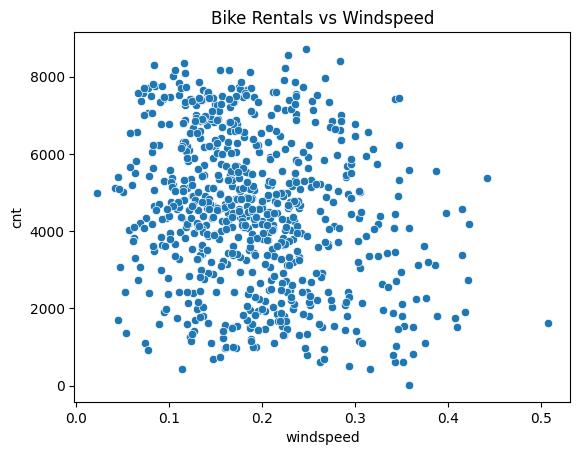

In [17]:
plt.figure(figsize=(12, 8))

# Temperature vs Rentals
sns.scatterplot(x='temp', y='cnt', data=df_day)
plt.title('Bike Rentals vs Temperature')
plt.show()

# Humidity vs Rentals
sns.scatterplot(x='hum', y='cnt', data=df_day)
plt.title('Bike Rentals vs Humidity')
plt.show()

# Windspeed vs Rentals
sns.scatterplot(x='windspeed', y='cnt', data=df_day)
plt.title('Bike Rentals vs Windspeed')
plt.show()


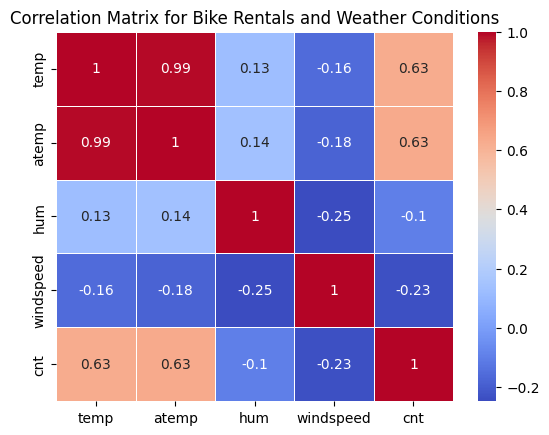

In [18]:
corr_matrix = df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Bike Rentals and Weather Conditions')
plt.show()

**Insight:**

**Pertanyaan 1**

Pada visualisasi pertama, kita mengagregasi jumlah penyewaan sepeda berdasarkan hari kerja, hari libur, dan akhir pekan. Diagram batang memvisualisasikan rata-rata jumlah penyewaan sepeda pada hari libur dibandingkan dengan hari kerja.

Visualisasi kedua membandingkan rata-rata penyewaan sepeda pada akhir pekan versus hari kerja.

**Pertanyaan 2**

Scatter-plots pada bagian kode pertama secara visual mengeksplorasi hubungan antara penyewaan sepeda dan tiga faktor cuaca penting: suhu, kelembapan, dan kecepatan angin.


- Suhu vs Sewa: Diharapkan korelasi positif—seiring suhu meningkat (ke tingkat yang nyaman), lebih banyak orang mungkin menyewa sepeda. Namun, suhu yang sangat tinggi dapat menyebabkan penurunan sewa karena ketidaknyamanan.
- Kelembapan vs Sewa: Kelembapan tinggi seringkali membuat aktivitas luar ruangan tidak nyaman, jadi kita mungkin melihat korelasi negatif—kelembapan yang lebih tinggi dapat menyebabkan lebih sedikit penyewaan.
- Kecepatan Angin vs Sewa: Angin kencang dapat membuat bersepeda menjadi lebih menantang, jadi kita mungkin juga akan mengamati korelasi negatif antara kecepatan angin dan penyewaan sepeda.

Heatmap hasil dari bagian kode kedua membantu kita menganalisis bagaimana penyewaan sepeda berkorelasi dengan kondisi cuaca:

- Korelasi Positif: Diharapkan suhu memiliki korelasi positif dengan penyewaan sepeda, yang menunjukkan bahwa lebih banyak sepeda disewa ketika cuaca hangat tetapi tidak terlalu panas.
- Korelasi Negatif: Kelembapan dan kecepatan angin mungkin menunjukkan korelasi negatif, yang menunjukkan bahwa kondisi cuaca yang tidak menguntungkan mengurangi minat penyewaan sepeda.

Langkah ini mengonfirmasi pengamatan kita dari scatter-plots dan memberikan pemahaman yang lebih mendalam tentang bagaimana cuaca mempengaruhi keputusan penggunaan sepeda.

## Conclusion

- **Conclution pertanyaan 1**  

> **Hari libur dan akhir pekan**: Analisis kemungkinan menunjukkan bahwa hari libur dan akhir pekan memiliki volume penyewaan sepeda yang lebih tinggi dibandingkan dengan hari kerja biasa. Layanan berbagi sepeda dapat mengoptimalkan sumber daya mereka dan menawarkan promosi yang ditargetkan selama periode permintaan tinggi ini.


- **Conclution pertanyaan 2**


> **Kondisi cuaca**: Suhu berpengaruh positif terhadap penyewaan sepeda, sementara kelembapan ekstrem dan kecepatan angin kemungkinan besar menghalangi pengguna. Informasi ini dapat digunakan oleh perusahaan penyewaan sepeda untuk memprediksi permintaan berdasarkan ramalan cuaca, menyesuaikan ketersediaan sepeda, atau menawarkan promosi selama kondisi cuaca yang menguntungkan.

